In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [224]:
data = pd.read_csv('Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [226]:
data .describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [227]:
data.shape

(9240, 37)

# Univariate analysis along with data Wrangling

0
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
dtype: int64


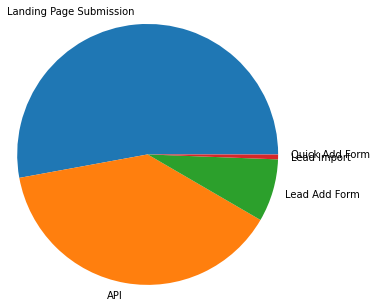

In [228]:
# start understanding each feature one by one
# start with 
#Lead Origin
print(data['Lead Origin'].isnull().sum())
# does not have missing values
print(data.value_counts('Lead Origin'))
# 5 unique categories in which lead origin having highest instance through Landing Page Submission and API
plt.pie(data.value_counts('Lead Origin'),labels=['Landing Page Submission', 'API', 'Lead Add Form',
       'Lead Import','Quick Add Form'], radius=1.5)
plt.show()

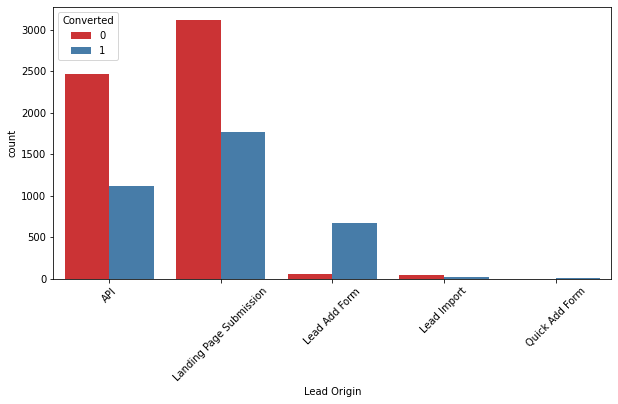

In [229]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

In [230]:
#Lead Source
print(data['Lead Source'].isnull().sum())
# 36 missing values
print(data.value_counts('Lead Source'))
#unique categories are many and most lead sources fom google, direct traffic and chat
# since only few values are missing will drop those rows
data = data.dropna(subset = ["Lead Source"])
print(data['Lead Source'].isnull().sum())

36
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
dtype: int64
0


In [231]:
#Lead Origin
print(data['Do Not Email'].isnull().sum())
# does not have missing values
print(data.value_counts('Do Not Email'))
# 2 unique categories yes and no most want do not mail No.

0
Do Not Email
No     8483
Yes     721
dtype: int64


In [232]:
#Lead Origin
print(data['Do Not Call'].isnull().sum())
# does not have missing values
print(data.value_counts('Do Not Call'))
# 2 unique categories yes and no most want do not call NO.

0
Do Not Call
No     9202
Yes       2
dtype: int64


In [233]:
# Select is the non actioned value put in data which is equavalen to null
# this might be present in other column also
# let's replace all "Select" in dataset with null
data = data.replace('Select', np.nan)

In [234]:
#Lead Profile
print(data['Lead Profile'].isnull().sum())
# does have many missing values
print(data.value_counts('Lead Profile'))
# 5 unique categories  most of potential one

6824
Lead Profile
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
dtype: int64


In [235]:
# out of many columns just see percentage of missing in each feature
round(data.isnull().sum()/len(data.index),2)*100
# many columns having more than 40% value missing drop those columns

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          26.0
Specialization                                   36.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [236]:
# dropping those columns
data=data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [237]:
# again finding null percentage
round(data.isnull().sum()/len(data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          26.0
Specialization                                   36.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

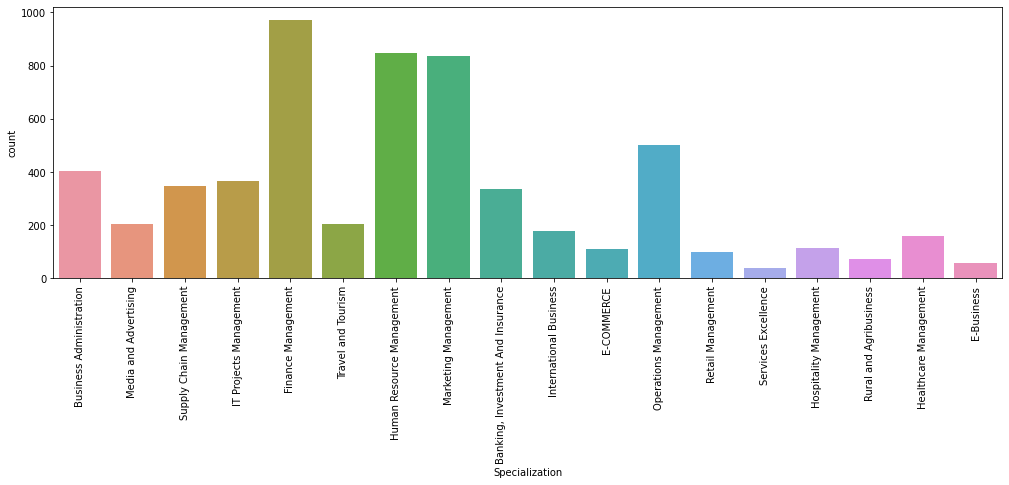

In [238]:
# see Speclization
# has 36% values missing
plt.figure(figsize=(17,5))
sns.countplot(data['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [239]:
# applicant's might be students or did't update their Specialization ,
#instead of droping just create Others category for all of them.
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')

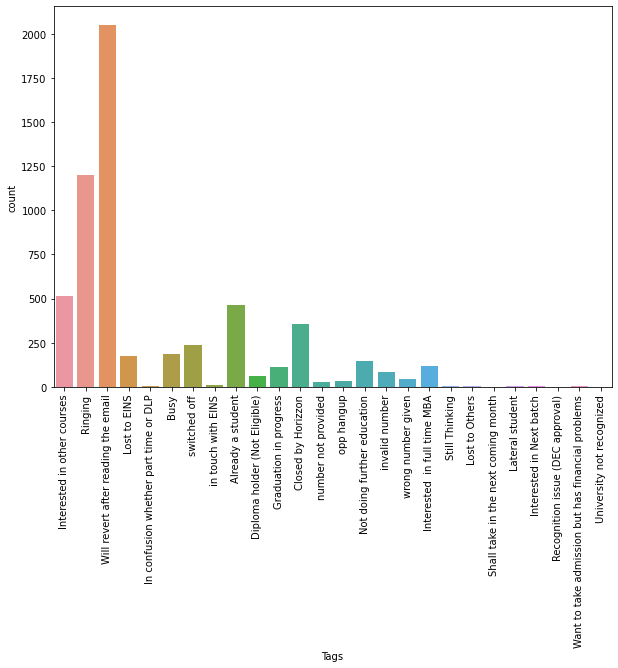

In [240]:
# Tags column
plt.figure(figsize=(10,7))
sns.countplot(data['Tags'])
plt.xticks(rotation=90)
plt.show()

In [241]:
# there are 36% values missing 
# let's impute them with Mode value, that's 'will revert after reading the mail'
data['Tags']=data['Tags'].replace(np.nan,'Will revert after reading the email')

In [242]:
print(data['What matters most to you in choosing a course'].isnull().sum())
data['What matters most to you in choosing a course'].value_counts()
# if we see this column many values missing almost 29%
# all available having ecept 3 values belong to one category
# is unuseful for our task since it does not add any value in prediction
# drop this column
data.drop('What matters most to you in choosing a course',axis=1, inplace = True)

2709


2690


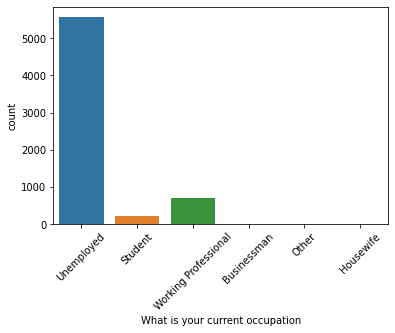

In [243]:
# see 'What is your current occupation'
print(data['What is your current occupation'].isnull().sum())
sns.countplot(data['What is your current occupation'])
plt.xticks(rotation=45)
plt.show()
# 29% of value misssing

In [244]:
# seems almost 80% of instances are categories to Unemployed
# replace with Unemployed
data['What is your current occupation']=data['What is your current occupation'].replace(np.nan,'Unemployed')

In [245]:
# city 40% value missing
data["City"].value_counts()

Mumbai                         3220
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

In [246]:
# most of data from Mumbai 
# replace null with Mimbai
data['City']=data['City'].replace(np.nan,'Mumbai')

In [247]:
# country
#29% we have missing values
data['Country'].value_counts()

India                   6491
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [248]:
# almost 98% instance from INDIA
# replace missing with india
data['Country']=data['Country'].replace(np.nan,'India')

In [249]:
# see again missing values
round(data.isnull().sum()/len(data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [250]:
# rest are under 1% missing values 
data = data.dropna()
data.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Cou

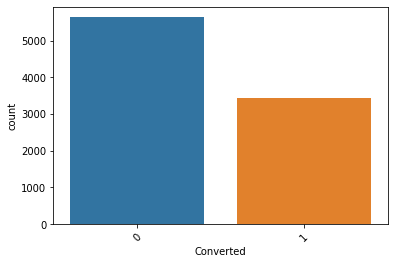

In [251]:
# Converted
sns.countplot(data['Converted'])
plt.xticks(rotation=45)
plt.show()
# ratio seems to be 60:40 not converted: converted

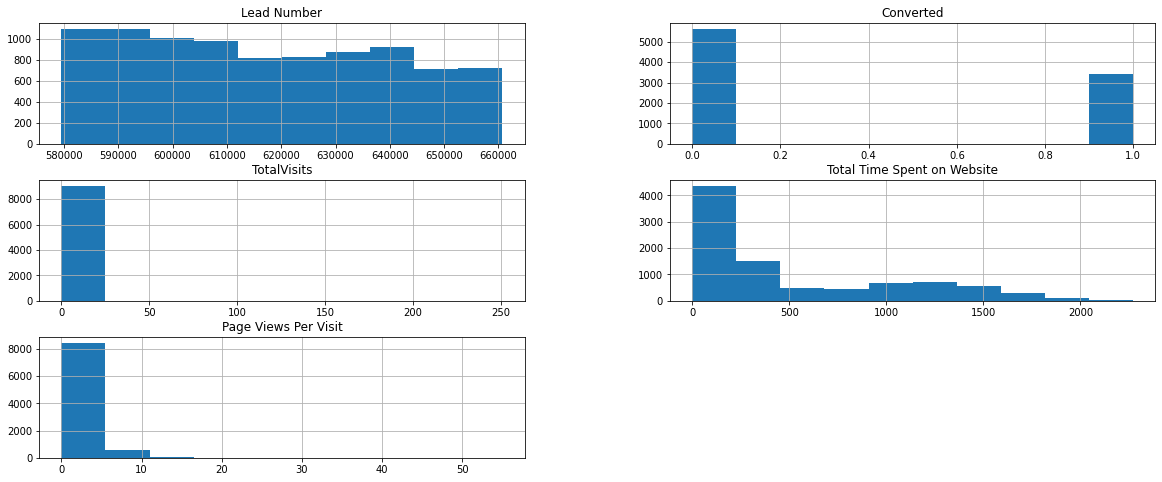

In [252]:
# TotalVisit,  Page Vews per Visit and Total Time spent on Website
data.hist(figsize=(20,8))
plt.show()

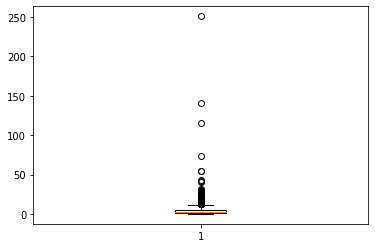

In [253]:
# we can see there is an outlier in both TotalVisits and Page Views Per Visit
plt.boxplot(data['TotalVisits'])
plt.show()

In [254]:
data["TotalVisits"].quantile([.10,.4,.6,.95,.99])

0.10     0.0
0.40     2.0
0.60     3.0
0.95    10.0
0.99    17.0
Name: TotalVisits, dtype: float64

In [255]:
# remove below and above .05 and .95 respectvely 
perc = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= perc[0]] = perc[0]
data['TotalVisits'][data['TotalVisits'] >= perc[1]] = perc[1]

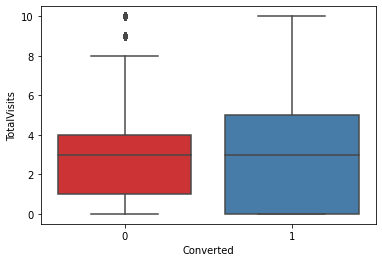

In [256]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data,palette='Set1')
plt.show()

In [257]:
# Page Views Per Visit
data["Page Views Per Visit"].quantile([.10,.4,.6,.95,.99])

0.10    0.0
0.40    2.0
0.60    2.5
0.95    6.0
0.99    9.0
Name: Page Views Per Visit, dtype: float64

In [258]:
# remove below and above .05 and .95 respectvely 
perc = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= perc[0]] = perc[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= perc[1]] = perc[1]

In [259]:
# Last Activity
data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

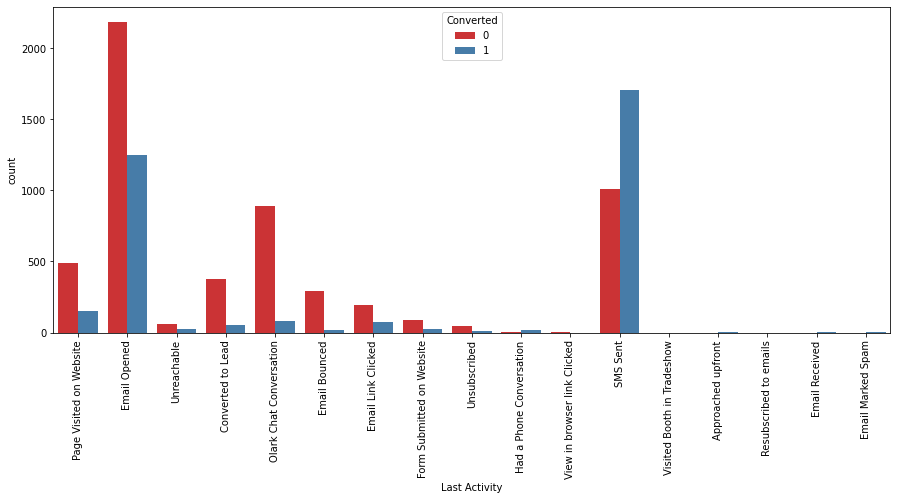

In [260]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [261]:
# many instance having very few instance , Let's put them into Otheres together
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'],
                                                      'Other_Activity')

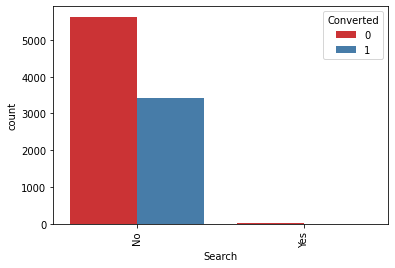

In [262]:
# Search
sns.countplot(x = "Search", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()
# 

In [263]:
binary_col = ['Search' , 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement','Through Recommendations',
               'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
             'A free copy of Mastering The Interview']

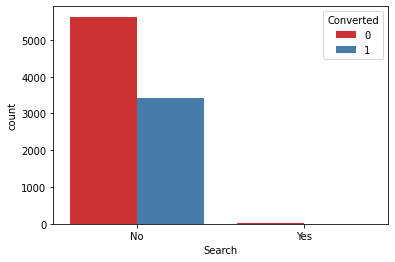

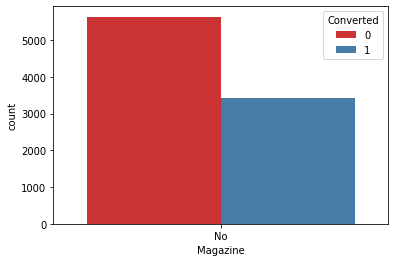

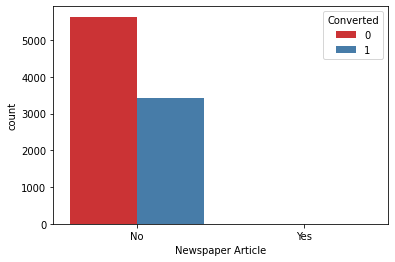

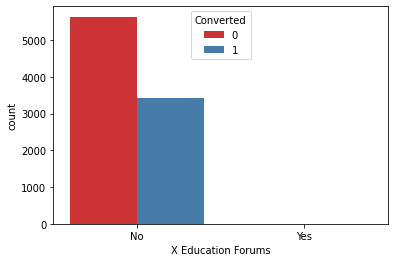

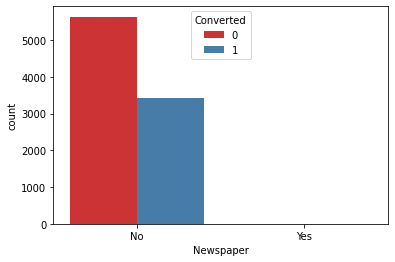

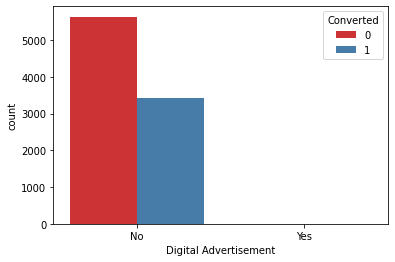

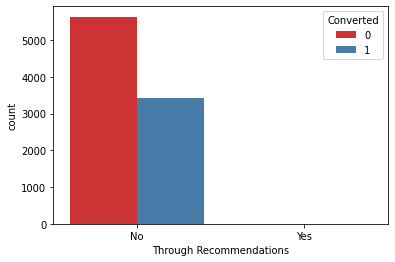

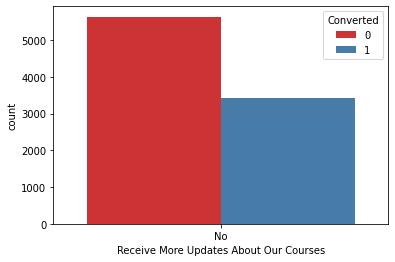

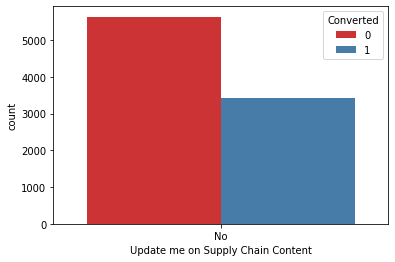

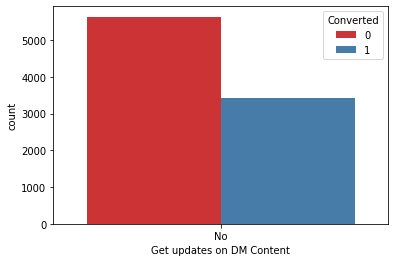

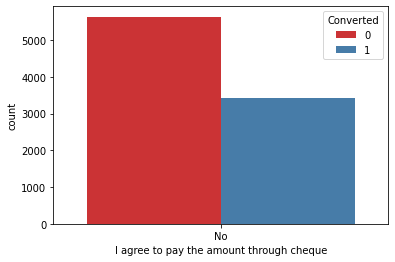

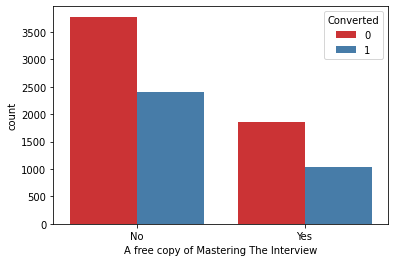

In [264]:
# list all binary category and plot at once
for i, feature in enumerate(binary_col):
    sns.countplot(x = data[feature],hue = "Converted", data = data,palette='Set1')
    plt.show()

In [265]:
# based on analysis we see that below attributes are not relevent and not adding any information to our task, so Drop it.
col_drop = ['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview']
data = data.drop(col_drop, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

In [266]:
# final data frame we got
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified


# Data preperation for model

In [267]:
#convert yes and no to 0 and 1
data['Do Not Email'] = data['Do Not Email'].apply(lambda x : 1 if x == 'Yes' else 0)
data['Do Not Email'].value_counts()

0    8358
1     716
Name: Do Not Email, dtype: int64

In [268]:
#convert yes and no to 0 and 1
data['Do Not Call'] = data['Do Not Call'].apply(lambda x : 1 if x == 'Yes' else 0)
data['Do Not Call'].value_counts()

0    9072
1       2
Name: Do Not Call, dtype: int64

In [269]:
# Creating a dummy for categorical features
dummy_data = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [270]:
# concat with dataframe
data = pd.concat([data, dummy_data], axis=1)
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [271]:
# drop original column for which dummy created
data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

# split data for model into train and test

In [272]:
from sklearn.model_selection import train_test_split
X = data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [273]:
# target
y = data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [274]:
# train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [275]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website',
         'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website',
                                                                  'Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


# Feature Engineering

In [276]:
# using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg)         
rfe = rfe.fit(X_train, y_train)

In [277]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True, False, False,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True, False, False,
       False, False, False,  True, False,  True,  True,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False,  True,  True,  True, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True,  True,  True, False,  True,  True,  True,  True])

In [278]:
# print rank wise
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 34),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 15),
 ('Lead Source_NC_EDM', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 24),
 ('Lead Source_Press_Release', False, 21),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 28),
 ('Lead Source_blog', True, 1),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 20),
 ('Lead So

In [279]:
# Selected column by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Lead Source_blog',
       'Lead Source_google', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Work

In [280]:
# Build model now
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2559.7
Date:                Sun, 22 Jan 2023   Deviance:                       5119.4
Time:                        19:50:06   Pearson chi2:                 6.41e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4096
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4633      1.108      1.321      0.187      -0.709       3.635
Do Not Email                                            -1.6394      0.210     -7.792      0.000      -2.052      -1.227
Do Not Call                                             22.6056   5.42e+04      0.000      1.000   -1.06e+05    1.06e+05
Total Time Spent on Website                              1.1083      0.041     26.918      0.000       1.028       1.189
Lead Origin_Landing Page Submission                     -1.0079      0.136     -7.389      0.000      -1.275      -0.741
Lead Origin_Lead Add Form                                1.2899      1.066      1.210      0.226      -0.799       3.379
Lead Origin_Lead Import                                  0.6773      0.867      0.782      0.434      -1.021       2.376
Lead Source_Direct Traffic                              -0.4635      0.726     -0.638      0.523      -1.887       0.960
Lead Source_Google                                      -0.1623      0.726     -0.224      0.823      -1.585       1.261
Lead Source_Olark Chat                                   0.8667      0.732      1.185      0.236      -0.567       2.301
Lead Source_Organic Search                              -0.3606      0.730     -0.494      0.621      -1.791       1.070
Lead Source_Reference                                    1.8134      0.922      1.967      0.049       0.006       3.620
Lead Source_Referral Sites                              -0.4791      0.801     -0.598      0.550      -2.049       1.091
Lead Source_Social Media                                 1.4922      1.698      0.879      0.379      -1.835       4.820
Lead Source_Welingak Website                             4.3748      1.153      3.793      0.000       2.114       6.635
Lead Source_blog                                       -22.9950   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_google                                     -21.1469   3.63e+04     -0.001      1.000   -7.11e+04    7.11e+04
Last Activity_Email Opened                               0.7664      0.203      3.779      0.000       0.369       1.164
Last Activity_Olark Chat Conversation                   -0.5310      0.242     -2.196      0.028      -1.005      -0.057
Last Activity_Other_Activity                             2.2995      0.586      3.925      0.000       1.151       3.448
Last Activity_Page Visited on Website                    0.4561      0.255      1.786      0.074      -0.044       0.957
Last Activity_SMS Sent                                   1.2166      0.205      5.949      0.000       0.816       1.617
Last Activity_Unreachable                                0

In [281]:
print(type(list(result.pvalues)))
print(list(result.pvalues))

<class 'list'>
[0.18665997858350614, 6.611990967303732e-15, 0.9996672896031533, 1.3577325824114958e-159, 1.4759665020690838e-13, 0.226158437125779, 0.43441555488631933, 0.5233358084396522, 0.823056529506127, 0.23614527362491067, 0.621371708195499, 0.049213092838872444, 0.5498326187859351, 0.37940193383311893, 0.0001489006599513899, 0.9997691052697238, 0.9995349358185882, 0.00015769446499670688, 0.028094646475187446, 8.663219294554617e-05, 0.07402337269553773, 2.698578607029249e-09, 0.4399374596234771, 0.17614407791979114, 0.21292603489869888, 1.351568710528153e-18, 0.9992759712664411, 0.4070090715712992, 0.10951733453805487, 0.016356598786723145, 0.3116976944540707, 0.16030948348037677, 0.03695352394126282, 0.7055977584813136, 0.00442783736790635, 0.05285492711007722, 0.06845650804190635, 0.8031098797758198, 0.3692801667388862, 0.7138817335929384, 0.9997456166039649]


In [282]:
dict = result.pvalues.to_dict() 
dict
high_p  = list()
high_p = [i for i, j in dict.items() if j>.05]

In [283]:
cols

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Lead Source_blog',
       'Lead Source_google', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Work

In [284]:
print(high_p)
high_p.remove('const')
# drop these features
cols1 = cols.drop(high_p)

['const', 'Do Not Call', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_blog', 'Lead Source_google', 'Last Activity_Page Visited on Website', 'Last Activity_Unreachable', 'Last Activity_Unsubscribed', 'Specialization_Hospitality Management', 'What is your current occupation_Housewife', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'City_Tier II Cities', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Page Visited on Website', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable', 'Last Notable Activity_Unsubscribed', 'Last Notable Activity_View in browser link Clicked']


In [285]:
# Build model now
print(len(cols1))
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[cols1])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

13


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2637.9
Date:                Sun, 22 Jan 2023   Deviance:                       5275.8
Time:                        19:50:07   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3949
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3175      0.150      2.118      0.034       0.024       0.611
Do Not Email                                            -1.4469      0.180     -8.032      0.000      -1.800      -1.094
Total Time Spent on Website                              0.9714      0.037     26.389      0.000       0.899       1.044
Lead Origin_Landing Page Submission                     -1.5008      0.121    -12.385      0.000      -1.738      -1.263
Lead Source_Reference                                    2.7732      0.232     11.940      0.000       2.318       3.228
Lead Source_Welingak Website                             5.2407      0.725      7.231      0.000       3.820       6.661
Last Activity_Email Opened                               0.7866      0.163      4.839      0.000       0.468       1.105
Last Activity_Olark Chat Conversation                   -0.5572      0.185     -3.019      0.003      -0.919      -0.196
Last Activity_Other_Activity                             2.3010      0.466      4.933      0.000       1.387       3.215
Last Activity_SMS Sent                                   1.3498      0.111     12.185      0.000       1.133       1.567
Specialization_Others                                   -1.1354      0.123     -9.196      0.000      -1.377      -0.893
What is your current occupation_Working Professional     2.5753      0.192     13.409      0.000       2.199       2.952
Last Notable Activity_Email Opened                      -0.8093      0.174     -4.644      0.000      -1.151      -0.468
Last Notable Activity_Modified                          -1.1632      0.105    -11.129      0.000      -1.368      -0.958
========================================================================================================================
"""

In [288]:
# are final features
# make Predictions
y_train_pred = result.predict(X_train_sm)
y_train_pred[:5]

3009    0.203980
1012    0.152519
9226    0.183242
4750    0.853563
7987    0.723770
dtype: float64

In [289]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20397987, 0.15251905, 0.18324199, 0.85356327, 0.72377013,
       0.74212612, 0.11284205, 0.97115891, 0.81094474, 0.69172223])

In [290]:
# dataframe
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.203980,3009
1,0,0.152519,1012
2,0,0.183242,9226
3,1,0.853563,4750
4,1,0.723770,7987


In [291]:
# make cutoff
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.203980,3009,0
1,0,0.152519,1012,0
2,0,0.183242,9226,0
3,1,0.853563,4750,1
4,1,0.723770,7987,1


In [292]:
# confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3466  439]
 [ 811 1635]]


In [293]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8031806014800819


In [294]:
# Prety well does this model on train data